In [3]:
import numpy as np
import pandas as pd 

In [4]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
unique_counts = df.nunique()
print(unique_counts)

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


# One-hot encoding

In [8]:
cat_variables = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [9]:
df = pd.get_dummies(data = df, prefix = cat_variables, columns = cat_variables, dtype = int)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [10]:
features = [x for x in df.columns if x not in 'HeartDisease']
features

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [11]:
len(features)

20

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size = 0.8, random_state = 42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Using Decision Tree 

In [15]:
min_samples_list = [2, 10, 20, 50, 100, 200, 400, 500, 700]
max_depth_list = [1,2,3,4,8,16,32,64,80, None]

## Finding suitable hyperparameter values for Decision Tree

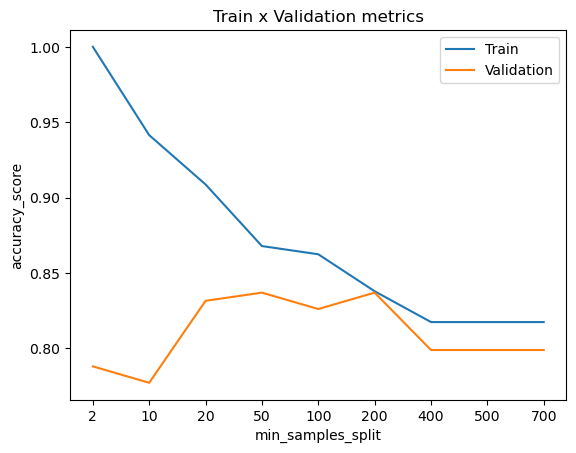

In [16]:
accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split, random_state = 100).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy_score')
plt.xticks(ticks = range(len(min_samples_list)), labels = min_samples_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])

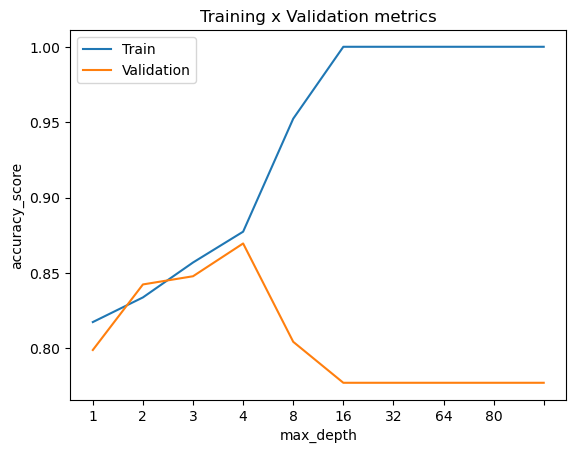

In [17]:
accuracy_train_list = []
accuracy_val_list = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 101).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_train_list.append(accuracy_train)
    accuracy_val_list.append(accuracy_val)
plt.title('Training x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.xticks(ticks = range(len(max_depth_list)), labels = max_depth_list)
plt.plot(accuracy_train_list)
plt.plot(accuracy_val_list)
plt.legend(['Train', 'Validation'])

## Training and evaluating the Decision Tree model

In [18]:
decision_tree_model = DecisionTreeClassifier(max_depth = 4, min_samples_split = 50, random_state = 42 ).fit(X_train, y_train)



In [19]:
print("Metrics train\n\tAccuracy score: ", accuracy_score(decision_tree_model.predict(X_train), y_train))
print("Metrics validation\n\tAccuracy score: ", accuracy_score(decision_tree_model.predict(X_val), y_val))

Metrics train
	Accuracy score:  0.8583106267029973
Metrics validation
	Accuracy score:  0.8369565217391305


# Using Random Forests

In [20]:
min_samples_split_list = [2, 10, 30, 50, 100, 200, 400, 500, 700]
max_depth_list = [2, 3, 4, 8, 16, 32, 64, 100, None]
n_estimators_list = [10,50,100,500]

## Finding suitable hyperparameter values

In [21]:
from sklearn.ensemble import RandomForestClassifier

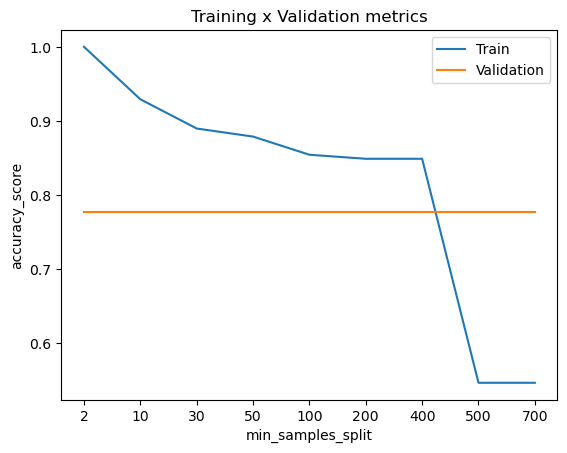

In [22]:
accuracy_train_list = []
accuracy_val_list = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    prediction_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_train_list.append(accuracy_train)
    accuracy_val_list.append(accuracy_val)
plt.title('Training x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy_score')
plt.xticks(ticks = range(len(min_samples_split_list)), labels = min_samples_split_list)
plt.plot(accuracy_train_list)
plt.plot(accuracy_val_list)
plt.legend(['Train', 'Validation'])

Choosing min_samples_split = 100 seems reasonable as the training accuracy is close to cross-validation accuracy and so, the model is not overfitting

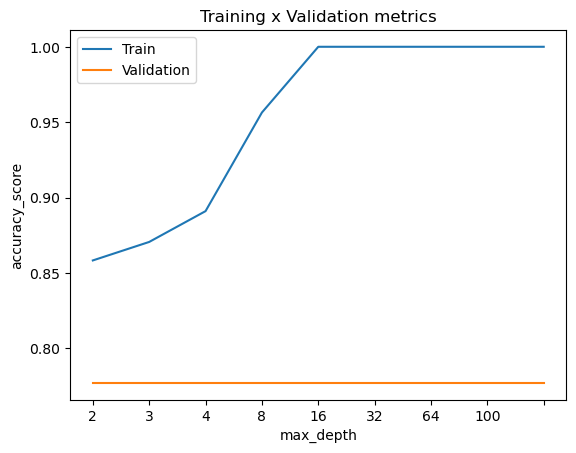

In [23]:
accuracy_train_list = []
accuracy_val_list = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    prediction_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_train_list.append(accuracy_train)
    accuracy_val_list.append(accuracy_val)
plt.title('Training x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.xticks(ticks = range(len(max_depth_list)), labels = max_depth_list)
plt.plot(accuracy_train_list)
plt.plot(accuracy_val_list)
plt.legend(['Train', 'Validation'])

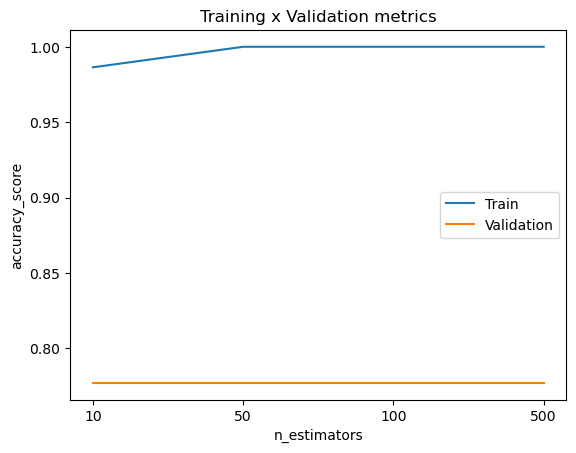

In [24]:
accuracy_train_list = []
accuracy_val_list = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators, random_state = 42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    prediction_val = model.predict(X_val)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_val, y_val)
    accuracy_train_list.append(accuracy_train)
    accuracy_val_list.append(accuracy_val)
plt.title('Training x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy_score')
plt.xticks(ticks = range(len(n_estimators_list)), labels = n_estimators_list)
plt.plot(accuracy_train_list)
plt.plot(accuracy_val_list)
plt.legend(['Train', 'Validation'])

## Training and evaluating the model

Choosing suitable parameter values, we make our random forest model: 

In [25]:
random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 8, min_samples_split = 100).fit(X_train,y_train)

In [26]:
print("Metrics train:\n\tAccuracy score: ", accuracy_score(random_forest_model.predict(X_train), y_train))
print("Metrics validation:\n\tAccuracy score: ", accuracy_score(random_forest_model.predict(X_val), y_val))

Metrics train:
	Accuracy score:  0.8501362397820164
Metrics validation:
	Accuracy score:  0.8152173913043478


# Using XGBoost

In [27]:
from xgboost import XGBClassifier

In [28]:
n = int(len(X_train)*0.8)

In [29]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

**Note** :  In newer version of XGBoost, early_stopping_rounds needs to be specified inside the constructor itself. Earlier, it was done while fitting the model.

In [30]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1, verbosity = 1, random_state = 42, early_stopping_rounds = 10)
xgb_model.fit(X_train_fit, y_train_fit, eval_set = [(X_train_eval, y_train_eval)])

[0]	validation_0-logloss:0.65147
[1]	validation_0-logloss:0.61294
[2]	validation_0-logloss:0.57975
[3]	validation_0-logloss:0.55176
[4]	validation_0-logloss:0.53179
[5]	validation_0-logloss:0.51404
[6]	validation_0-logloss:0.49887
[7]	validation_0-logloss:0.48811
[8]	validation_0-logloss:0.47910
[9]	validation_0-logloss:0.47019
[10]	validation_0-logloss:0.46102
[11]	validation_0-logloss:0.45350
[12]	validation_0-logloss:0.44869
[13]	validation_0-logloss:0.44373
[14]	validation_0-logloss:0.44140
[15]	validation_0-logloss:0.43771
[16]	validation_0-logloss:0.43603
[17]	validation_0-logloss:0.43263
[18]	validation_0-logloss:0.43099
[19]	validation_0-logloss:0.42716
[20]	validation_0-logloss:0.42804
[21]	validation_0-logloss:0.42717
[22]	validation_0-logloss:0.42610
[23]	validation_0-logloss:0.42524
[24]	validation_0-logloss:0.42592
[25]	validation_0-logloss:0.42088
[26]	validation_0-logloss:0.41736
[27]	validation_0-logloss:0.41674
[28]	validation_0-logloss:0.41551
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [31]:
xgb_model.best_iteration

29

In [32]:
print("Metrics train:\n\tAccuracy score: ", accuracy_score(xgb_model.predict(X_train), y_train))
print("Metrics train:\n\tAccuracy score: ", accuracy_score(xgb_model.predict(X_val), y_val))

Metrics train:
	Accuracy score:  0.9386920980926431
Metrics train:
	Accuracy score:  0.8695652173913043
